Files found: ['C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch0.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch1.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch2.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch3.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch5.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch6.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch7.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch8.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch9.jpg']
time= 0 hr   Scratch area= 33426 pix²
time= 1 hr   Scratch area= 27683 pix²
time= 2 hr   Scratch area= 24106 pix²
time= 3 hr   Scratch area= 21123 pix²
time= 4 hr   Scratch area= 16105 pix²
time= 5 hr   Scratch area= 14417 pix²
time= 6 hr   Scratch area= 12717 pix²
time= 7 hr   Scratch area= 10957 pix²
time= 8 hr   Scratch area= 9337 pix²
y =  -2933.633333333334 x  +  30609.08888888889
R² =  0.9547154159906751


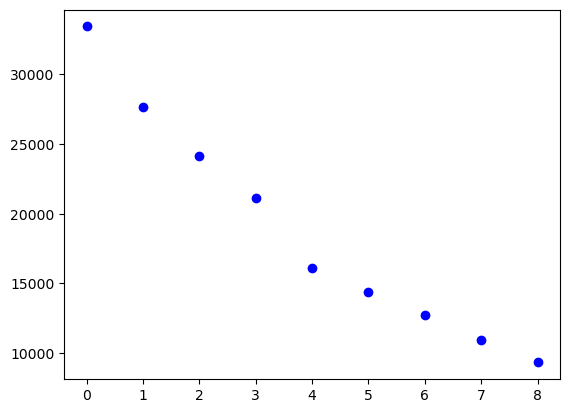

In [1]:
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
from skimage.filters import threshold_otsu
from scipy.stats import linregress
import glob

time = 0
time_list = []
area_list = []

# Update the path and pattern based on your file structure
path = "C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\*.*"

# Print the files returned by glob.glob() for debugging
files = glob.glob(path)
print("Files found:", files)

for file in files:
    img = io.imread(file)
    
    # Check if the image is already grayscale (2D)
    if img.ndim == 3:
        # Convert the 3D image to 2D grayscale
        img_gray = color.rgb2gray(img)
    else:
        img_gray = img
    
    entropy_img = entropy(img_gray, disk(3))
    thresh = threshold_otsu(entropy_img)
    binary = entropy_img <= thresh
    scratch_area = np.sum(binary == 1)
    print("time=", time, "hr  ", "Scratch area=", scratch_area, "pix²")
    time_list.append(time)
    area_list.append(scratch_area)
    time += 1

plt.plot(time_list, area_list, 'bo')  # Print blue dots scatter plot

slope, intercept, r_value, p_value, std_err = linregress(time_list, area_list)
print("y = ", slope, "x", " + ", intercept)
print("R² = ", r_value**2)

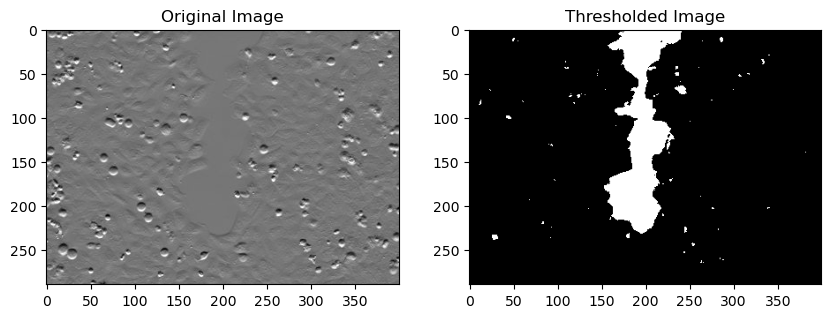

In [2]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(binary, cmap='gray')
plt.title('Thresholded Image')

plt.show()

Files found: ['C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch0.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch1.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch2.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch3.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch5.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch6.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch7.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch8.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch9.jpg']
time= 0 hr   Scratch area= 33426 pix²
time= 1 hr   Scratch area= 27683 pix²
time= 2 hr   Scratch area= 24106 pix²
time= 3 hr   Scratch area= 21123 pix²
time= 4 hr   Scratch area= 16105 pix²
time= 5 hr   Scratch area= 14417 pix²
time= 6 hr   Scratch area= 12717 pix²
time= 7 hr   Scratch area= 10957 pix²
time= 8 hr   Scratch area= 9337 pix²


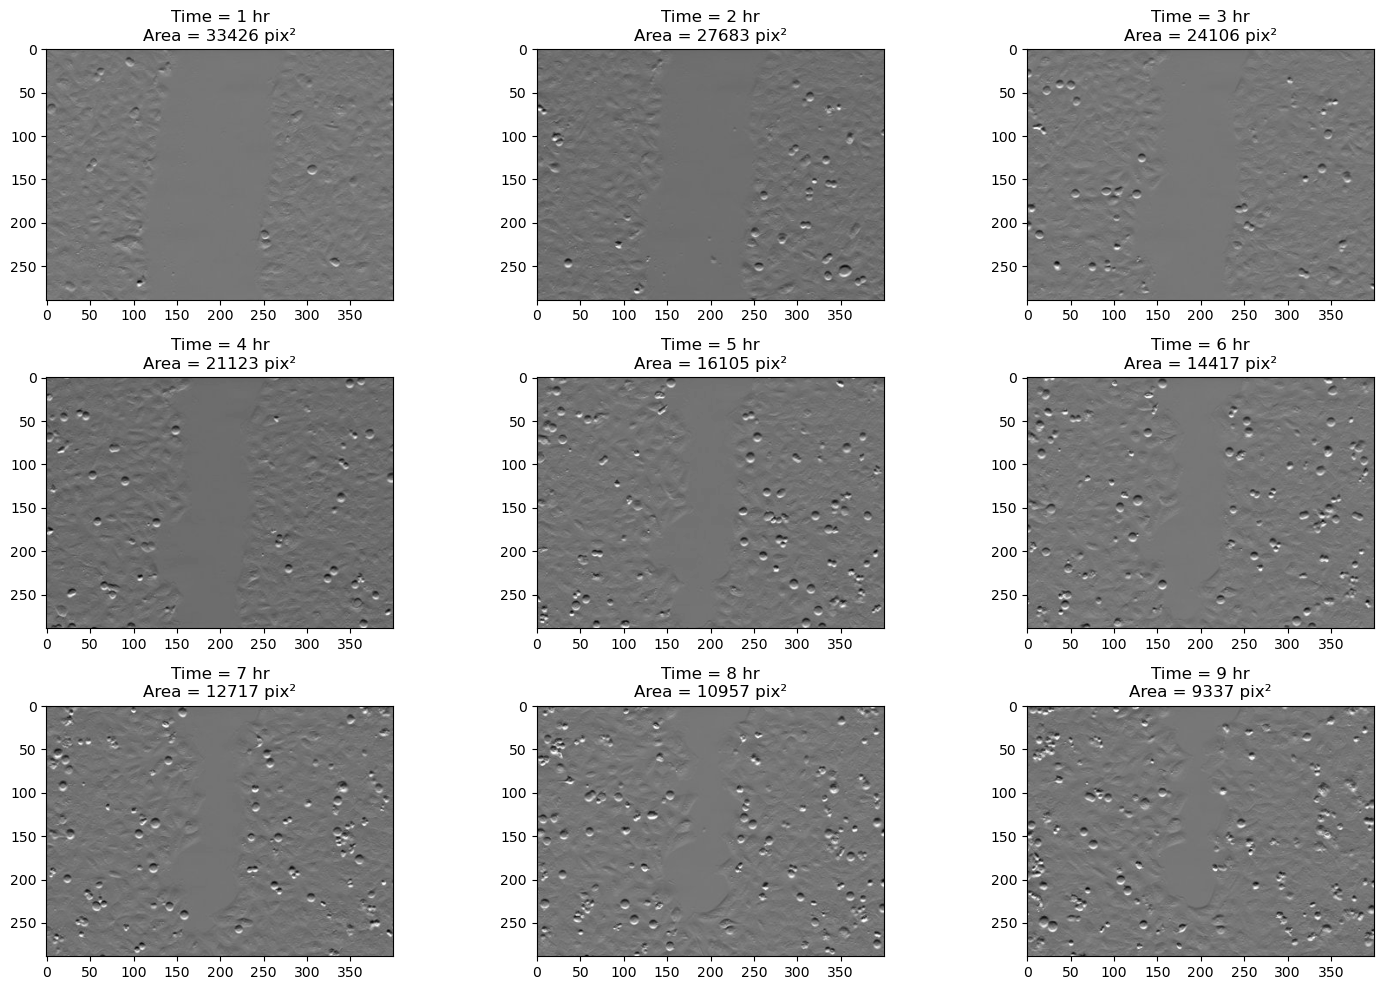

y =  -2933.633333333334 x  +  30609.08888888889
R² =  0.9547154159906751


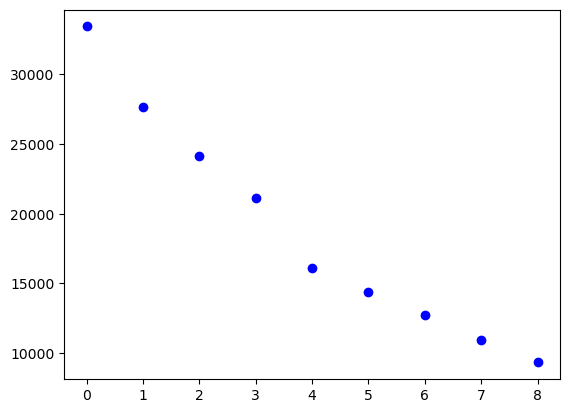

In [3]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
from skimage.filters import threshold_otsu
from scipy.stats import linregress
import glob
import math

time = 0
time_list = []
area_list = []

# Update the path and pattern based on your file structure
path = "C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\*.*"

# Print the files returned by glob.glob() for debugging
files = glob.glob(path)
print("Files found:", files)

num_images = len(files)

# Calculate the number of rows and columns for the subplot grid
num_cols = int(math.ceil(math.sqrt(num_images)))
num_rows = int(math.ceil(num_images / num_cols))

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for idx, file in enumerate(files):
    img = io.imread(file)
    entropy_img = entropy(img, disk(3))
    thresh = threshold_otsu(entropy_img)
    binary = entropy_img <= thresh
    scratch_area = np.sum(binary == 1)
    print("time=", time, "hr  ", "Scratch area=", scratch_area, "pix²")
    time_list.append(time)
    area_list.append(scratch_area)
    time += 1

    # Calculate the subplot index
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    # Display the original image and the thresholded image in the subplot
    axes[row_idx, col_idx].imshow(img, cmap='gray')
    axes[row_idx, col_idx].set_title(f'Time = {time} hr\nArea = {scratch_area} pix²')

# Remove any empty subplots
for idx in range(num_images, num_rows * num_cols):
    axes.flatten()[idx].remove()

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

plt.plot(time_list, area_list, 'bo')  # Print blue dots scatter plot

slope, intercept, r_value, p_value, std_err = linregress(time_list, area_list)
print("y = ", slope, "x", " + ", intercept)
print("R² = ", r_value**2)

Files found: ['C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch0.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch1.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch2.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch3.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch5.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch6.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch7.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch8.jpg', 'C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\Scratch9.jpg']
time= 0 hr   Scratch area= 33426 pix²
time= 1 hr   Scratch area= 27683 pix²
time= 2 hr   Scratch area= 24106 pix²
time= 3 hr   Scratch area= 21123 pix²
time= 4 hr   Scratch area= 16105 pix²
time= 5 hr   Scratch area= 14417 pix²
time= 6 hr   Scratch area= 12717 pix²
time= 7 hr   Scratch area= 10957 pix²
time= 8 hr   Scratch area= 9337 pix²


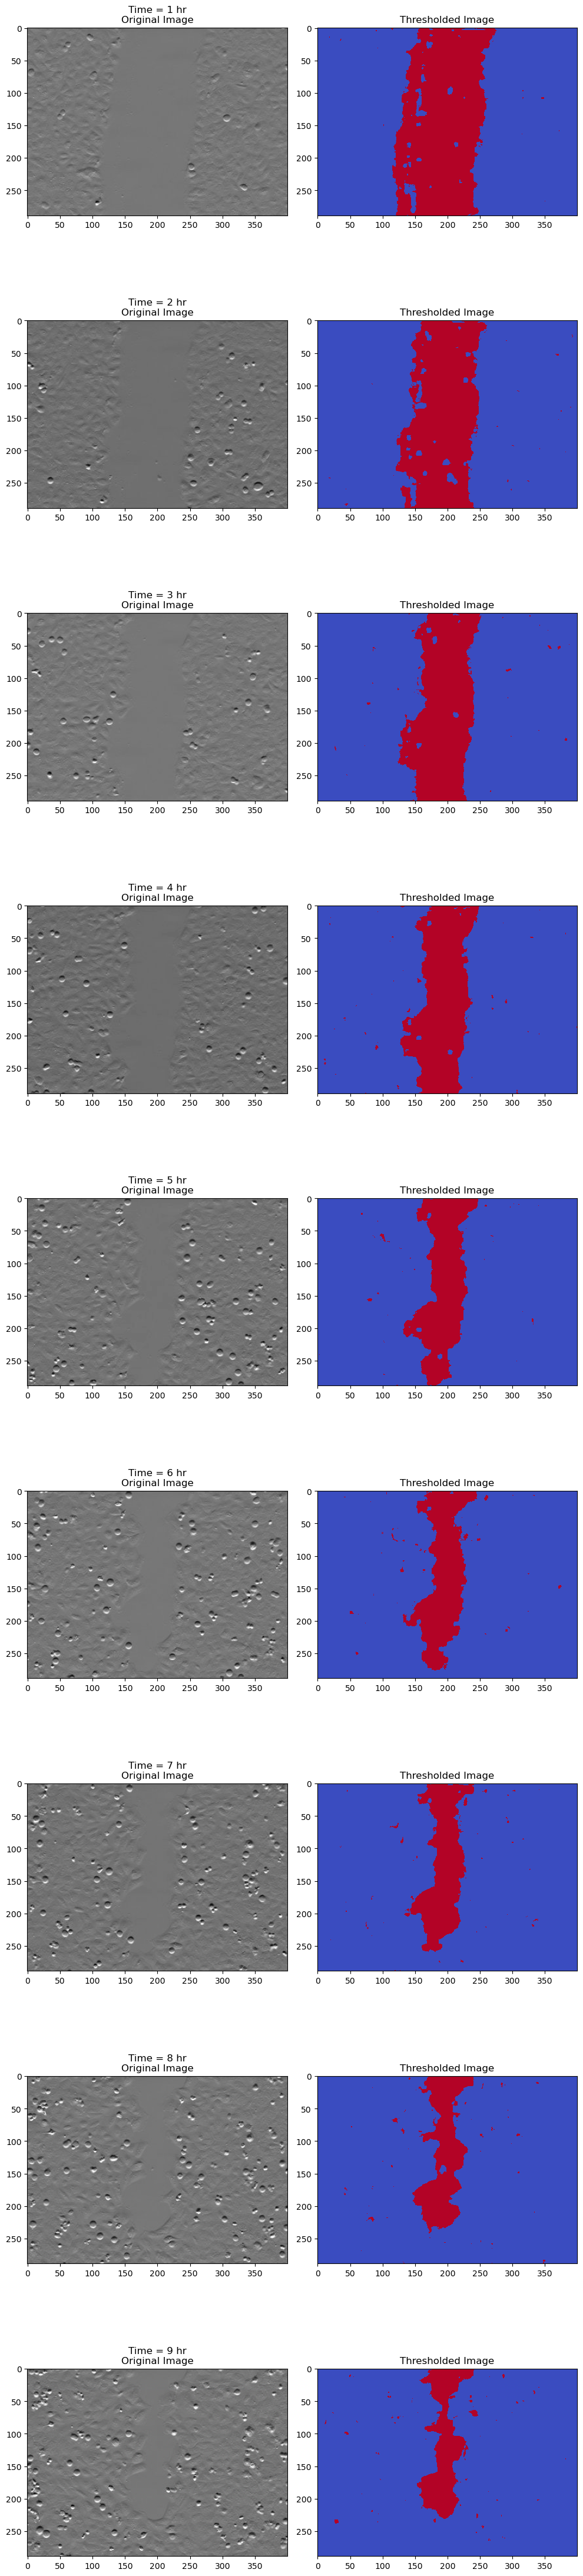

y =  -2933.633333333334 x  +  30609.08888888889
R² =  0.9547154159906751


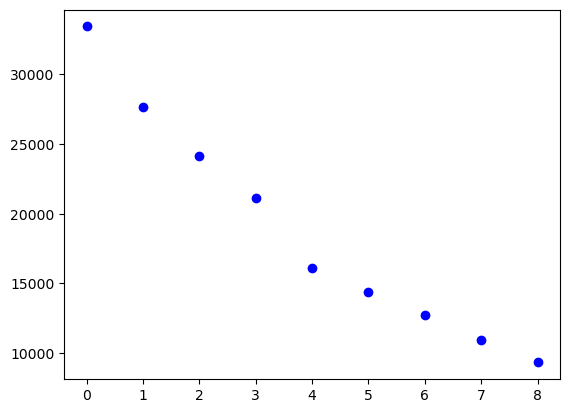

In [4]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
from skimage.filters import threshold_otsu
from scipy.stats import linregress
import glob

time = 0
time_list = []
area_list = []

# Update the path and pattern based on your file structure
path ="C:\\Users\\B-tech\\Desktop\\Lab-4\\Data\\*.*"
# Print the files returned by glob.glob() for debugging
files = glob.glob(path)
print("Files found:", files)

num_images = len(files)

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_images, 2, figsize=(10, num_images * 5))

for idx, file in enumerate(files):
    img = io.imread(file)
    entropy_img = entropy(img, disk(3))
    thresh = threshold_otsu(entropy_img)
    binary = entropy_img <= thresh
    scratch_area = np.sum(binary == 1)
    print("time=", time, "hr  ", "Scratch area=", scratch_area, "pix²")
    time_list.append(time)
    area_list.append(scratch_area)
    time += 1

    # Display the original image in the left column
    axes[idx, 0].imshow(img, cmap='gray')
    axes[idx, 0].set_title(f'Time = {time} hr\nOriginal Image')

    # Display the thresholded image in the right column with a different color
    axes[idx, 1].imshow(binary, cmap='coolwarm', interpolation='none')
    axes[idx, 1].set_title('Thresholded Image')

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

plt.plot(time_list, area_list, 'bo')  # Print blue dots scatter plot

slope, intercept, r_value, p_value, std_err = linregress(time_list, area_list)
print("y = ", slope, "x", " + ", intercept)
print("R² = ", r_value**2)